# Data Analysis

Use the provided Fannie Mae Acquisition and Performance data and
- Describe the descriptive statistics involved for column each dataset,
- Statistics between acquisition and performance,
- Statistics on `null` values per column.

Include all graphs and code in a `zip` file to be submitted.

In [1]:
import urllib
import matplotlib.pyplot as plt 

In [10]:
!wget https://labs-fannie-data.s3.amazonaws.com/Acquisition/Acquisition_2000Q1.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
url = r"https://labs-fannie-data.s3.amazonaws.com/Acquisition/Acquisition_2000Q1.txt"
urllib.request.urlretrieve(url, r'D:\Grad3\690\final\690-Fall-2019-Final-master\Acquisition_2000Q1.txt')

('D:\\Grad3\\690\\final\\690-Fall-2019-Final-master\\Acquisition_2000Q1.txt',
 <http.client.HTTPMessage at 0x2656ebceb70>)

In [3]:
!wget https://labs-fannie-data.s3.amazonaws.com/Performance/Performance_2000Q1.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [18]:
url = r"https://labs-fannie-data.s3.amazonaws.com/Performance/Performance_2000Q1.txt"
urllib.request.urlretrieve(url, r'D:\Grad3\690\final\690-Fall-2019-Final-master\Performance_2000Q1.txt')

('D:\\Grad3\\690\\final\\690-Fall-2019-Final-master\\Performance_2000Q1.txt',
 <http.client.HTTPMessage at 0x2656ec480f0>)

In [3]:
import pandas as pd
AcquisitionColumnNames = (
    "LOAN_ID", "ORIG_CHN", "Seller.Name", 
    "ORIG_RT", "ORIG_AMT", "ORIG_TRM", "ORIG_DTE",
    "FRST_DTE", "OLTV", "OCLTV", "NUM_BO", 
    "DTI", "CSCORE_B", "FTHB_FLG", "PURPOSE", 
    "PROP_TYP", "NUM_UNIT", "OCC_STAT", "STATE", "ZIP_3", 
    "MI_PCT", "Product.Type", "CSCORE_C", "MI_TYPE", 
    "RELOCATION_FLG"
)

PerformanceColumnNames = (
    "LOAN_ID", "Monthly.Rpt.Prd", "Servicer.Name", 
    "LAST_RT", "LAST_UPB", "Loan.Age", "Months.To.Legal.Mat", 
    "Adj.Month.To.Mat", "Maturity.Date", "MSA", 
    "Delq.Status", "MOD_FLAG", "Zero.Bal.Code", 
    "ZB_DTE", "LPI_DTE", "FCC_DTE","DISP_DT", 
    "FCC_COST", "PP_COST", "AR_COST", "IE_COST", 
    "TAX_COST", "NS_PROCS","CE_PROCS", "RMW_PROCS", 
    "O_PROCS", "NON_INT_UPB", "PRIN_FORG_UPB_FHFA", 
    "REPCH_FLAG", "PRIN_FORG_UPB_OTH", "TRANSFER_FLG"
)

acquisition_df = pd.read_csv(
    r"Acquisition_2000Q1.txt",
    names=AcquisitionColumnNames,
    header=None,
    sep="|"
)
performance_df = pd.read_csv(
    r"Performance_2000Q1.txt",
    names=PerformanceColumnNames,
    header=None,
    sep="|"
)

In [20]:
print(performance_df.head())

        LOAN_ID Monthly.Rpt.Prd Servicer.Name  LAST_RT  LAST_UPB  Loan.Age  \
0  100007365142      01/01/2000           NaN      8.0       NaN         0   
1  100007365142      02/01/2000           NaN      8.0       NaN         1   
2  100007365142      03/01/2000           NaN      8.0       NaN         2   
3  100007365142      04/01/2000           NaN      8.0       NaN         3   
4  100007365142      05/01/2000           NaN      8.0       NaN         4   

   Months.To.Legal.Mat  Adj.Month.To.Mat Maturity.Date  MSA  ... TAX_COST  \
0                360.0             359.0       01/2030    0  ...      NaN   
1                359.0             358.0       01/2030    0  ...      NaN   
2                358.0             357.0       01/2030    0  ...      NaN   
3                357.0             356.0       01/2030    0  ...      NaN   
4                356.0             355.0       01/2030    0  ...      NaN   

  NS_PROCS  CE_PROCS RMW_PROCS O_PROCS NON_INT_UPB PRIN_FORG_UPB_FHF

## Describe the descriptive statistics involved for column each dataset

We use the describe function to generate the statistics of the each column of each dataset. For those numerical columns we compute the mean and std and other statistics and for those categorical variables, the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. Timestamps also include the first and last items.

In [21]:
acquisition_df.describe(include='all')

,LOAN_ID,ORIG_CHN,Seller.Name,ORIG_RT,ORIG_AMT,ORIG_TRM,ORIG_DTE,FRST_DTE,OLTV,OCLTV,...,PROP_TYP,NUM_UNIT,OCC_STAT,STATE,ZIP_3,MI_PCT,Product.Type,CSCORE_C,MI_TYPE,RELOCATION_FLG
count,2.468630e+05,246863,246863,246863.000000,246863.000000,246863.000000,246863,246863,246861.000000,979.000000,...,246863,246863.000000,246863,246863,246863.000000,81816.000000,246863,123334.000000,81816.000000,246863
unique,NaN,3,22,NaN,NaN,NaN,15,16,NaN,NaN,...,5,NaN,3,53,NaN,NaN,1,NaN,NaN,2
top,NaN,R,OTHER,NaN,NaN,NaN,12/1999,02/2000,NaN,NaN,...,SF,NaN,P,CA,NaN,NaN,FRM,NaN,NaN,N
freq,NaN,127853,62637,NaN,NaN,NaN,86660,84351,NaN,NaN,...,211715,NaN,226224,25182,NaN,NaN,246863,NaN,NaN,244416
mean,5.502121e+11,NaN,NaN,8.009950,119903.067693,326.745106,NaN,NaN,76.430445,88.931563,...,NaN,1.038378,NaN,NaN,517.226470,24.368204,NaN,722.423314,1.038868,NaN
std,2.595659e+11,NaN,NaN,0.455647,56474.703865,69.246892,NaN,NaN,16.321432,10.050202,...,NaN,0.243611,NaN,NaN,295.429299,6.404682,NaN,53.615278,0.193597,NaN
min,1.000074e+11,NaN,NaN,3.000000,6000.000000,84.000000,NaN,NaN,4.000000,25.000000,...,NaN,1.000000,NaN,NaN,0.000000,1.000000,NaN,396.000000,1.000000,NaN
25%,3.251916e+11,NaN,NaN,7.750000,75000.000000,360.000000,NaN,NaN,70.000000,89.000000,...,NaN,1.000000,NaN,NaN,298.000000,18.000000,NaN,686.000000,1.000000,NaN
50%,5.501301e+11,NaN,NaN,8.000000,112000.000000,360.000000,NaN,NaN,80.000000,90.000000,...,NaN,1.000000,NaN,NaN,483.000000,25.000000,NaN,732.000000,1.000000,NaN
75%,7.747913e+11,NaN,NaN,8.250000,156000.000000,360.000000,NaN,NaN,90.000000,95.000000,...,NaN,1.000000,NaN,NaN,794.000000,30.000000,NaN,765.000000,1.000000,NaN


(array([1.50000e+01, 2.00000e+00, 4.80000e+01, 1.51400e+03, 4.80250e+04,
        1.72964e+05, 2.39920e+04, 2.85000e+02, 1.60000e+01, 2.00000e+00]),
 array([ 3.    ,  3.9325,  4.865 ,  5.7975,  6.73  ,  7.6625,  8.595 ,
         9.5275, 10.46  , 11.3925, 12.325 ]),
 <a list of 10 Patch objects>)

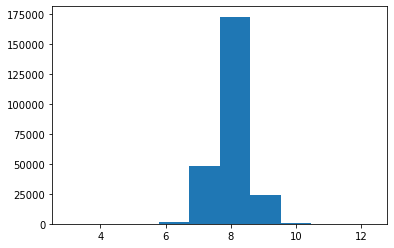

In [4]:
plt.hist(acquisition_df["ORIG_RT"]) # distribution of one column for example

In [22]:
performance_df.describe(include='all')

,LOAN_ID,Monthly.Rpt.Prd,Servicer.Name,LAST_RT,LAST_UPB,Loan.Age,Months.To.Legal.Mat,Adj.Month.To.Mat,Maturity.Date,MSA,...,TAX_COST,NS_PROCS,CE_PROCS,RMW_PROCS,O_PROCS,NON_INT_UPB,PRIN_FORG_UPB_FHFA,REPCH_FLAG,PRIN_FORG_UPB_OTH,TRANSFER_FLG
count,9.137238e+06,9137238,194683,9.137238e+06,7.668808e+06,9.137238e+06,9.131609e+06,9.038176e+06,9131609,9.137238e+06,...,2546.000000,3000.000000,1417.000000,356.000000,1574.000000,59733.000000,2529.000000,244744,2.0,840858
unique,NaN,234,36,NaN,NaN,NaN,NaN,NaN,484,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,NaN,03/01/2000,OTHER,NaN,NaN,NaN,NaN,NaN,01/2030,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,N
freq,NaN,246615,48564,NaN,NaN,NaN,NaN,NaN,2516428,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243420,NaN,832924
mean,5.506264e+11,NaN,NaN,7.932839e+00,9.691448e+04,3.485041e+01,2.854485e+02,2.698542e+02,NaN,2.613519e+04,...,2823.213472,76760.859650,28402.822498,62230.315758,9379.572071,939.061654,217.490925,NaN,6894.0,NaN
std,2.592343e+11,NaN,NaN,5.711133e-01,5.535016e+04,4.165566e+01,8.750521e+01,1.012983e+02,NaN,1.431485e+04,...,4628.347677,57007.888529,31570.330570,49123.485082,30823.304260,5232.917746,1952.730865,NaN,0.0,NaN
min,1.000074e+11,NaN,NaN,2.000000e+00,1.000000e-02,-1.000000e+00,-8.200000e+01,0.000000e+00,NaN,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,6894.0,NaN
25%,3.261615e+11,NaN,NaN,7.750000e+00,5.462910e+04,9.000000e+00,2.210000e+02,1.780000e+02,NaN,1.674000e+04,...,783.872500,32451.870000,12632.730000,32834.857500,397.445000,0.000000,0.000000,NaN,6894.0,NaN
50%,5.511279e+11,NaN,NaN,7.875000e+00,8.657429e+04,2.000000e+01,3.320000e+02,3.250000e+02,NaN,2.942000e+04,...,1534.200000,63967.495000,20300.580000,51983.280000,1145.885000,0.000000,0.000000,NaN,6894.0,NaN
75%,7.739269e+11,NaN,NaN,8.250000e+00,1.295897e+05,4.000000e+01,3.480000e+02,3.460000e+02,NaN,3.798000e+04,...,3178.702500,108427.390000,32138.040000,77232.192500,3460.767500,0.000000,0.000000,NaN,6894.0,NaN


## Statistics between acquisition and performance

In order to illustrate the relationship between this two tables, we simply count the number of data of performance dataset which has the same LOAN_ID with those in acquisition dataset.

In [33]:
descirbe_table = performance_df.groupby("LOAN_ID",as_index=False).count()
result = pd.DataFrame(acquisition_df["LOAN_ID"] )
result = pd.merge(result,descirbe_table,on="LOAN_ID",how="left")
print(result.head(20))

         LOAN_ID  Monthly.Rpt.Prd  Servicer.Name  LAST_RT  LAST_UPB  Loan.Age  \
0   100007365142               40              1       40        34        40   
1   100007386460               16              0       16        10        16   
2   100011322040               40              1       40        34        40   
3   100015192562               58              1       58        52        58   
4   100015874399               31              1       31        25        31   
5   100017922445               12              0       12         6        12   
6   100019048933               51              1       51        45        51   
7   100020205696               36              3       36        30        36   
8   100021703104               35              1       35        29        35   
9   100023274028               32              3       32        26        32   
10  100026859568               36              3       36        30        36   
11  100028993931            

## Statistics on null values per column

We count the null values of each column in each table.

In [34]:
acquisition_df.isnull().sum()

LOAN_ID                0
ORIG_CHN               0
Seller.Name            0
ORIG_RT                0
ORIG_AMT               0
ORIG_TRM               0
ORIG_DTE               0
FRST_DTE               0
OLTV                   2
OCLTV             245884
NUM_BO               295
DTI                10531
CSCORE_B            5924
FTHB_FLG               0
PURPOSE                0
PROP_TYP               0
NUM_UNIT               0
OCC_STAT               0
STATE                  0
ZIP_3                  0
MI_PCT            165047
Product.Type           0
CSCORE_C          123529
MI_TYPE           165047
RELOCATION_FLG         0
dtype: int64

In [35]:
performance_df.isnull().sum()

LOAN_ID                      0
Monthly.Rpt.Prd              0
Servicer.Name          8942555
LAST_RT                      0
LAST_UPB               1468430
Loan.Age                     0
Months.To.Legal.Mat       5629
Adj.Month.To.Mat         99062
Maturity.Date             5629
MSA                          0
Delq.Status               3329
MOD_FLAG                     0
Zero.Bal.Code          8892494
ZB_DTE                 8892494
LPI_DTE                9133909
FCC_DTE                9133964
DISP_DT                9133933
FCC_COST               9134182
PP_COST                9134633
AR_COST                9136067
IE_COST                9134475
TAX_COST               9134692
NS_PROCS               9134238
CE_PROCS               9135821
RMW_PROCS              9136882
O_PROCS                9135664
NON_INT_UPB            9077505
PRIN_FORG_UPB_FHFA     9134709
REPCH_FLAG             8892494
PRIN_FORG_UPB_OTH      9137236
TRANSFER_FLG           8296380
dtype: int64